<h2>Linear Regression</h2>

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt # ony pyplot required
sb.set() #seaborn style for graphics


In [4]:
final_data = pd.read_csv('Assets/skew_Corrected_Final_data.csv')
final_data.head()

,Unnamed: 0,price(USD),averageDifficulty,Daily Hash Rate(Trillions of hashes/s),cumulative total number of coins,activeAddresses
0,0,4.934474,16.125696,4.278455,11102989.8,83564
1,1,4.756861,16.125696,4.299074,11106339.8,81920
2,2,4.665795,16.125696,4.299074,11109764.8,82804
3,3,4.585987,16.125696,4.345594,11113739.8,69959
4,4,4.726502,16.125696,4.402392,11117864.8,72103


In [7]:
final_data = final_data.drop(["Unnamed: 0"],1)

C:\Users\clink\AppData\Local\Temp/ipykernel_17084/2414397178.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_data = final_data.drop(["Unnamed: 0"],1)


In [8]:
final_data

,price(USD),averageDifficulty,Daily Hash Rate(Trillions of hashes/s),cumulative total number of coins,activeAddresses
0,4.934474,16.125696,4.278455,11102989.80,83564
1,4.756861,16.125696,4.299074,11106339.80,81920
2,4.665795,16.125696,4.299074,11109764.80,82804
3,4.585987,16.125696,4.345594,11113739.80,69959
4,4.726502,16.125696,4.402392,11117864.80,72103
...,...,...,...,...,...
2005,8.776605,29.602320,17.698318,17330008.54,580054
2006,8.776886,29.602320,17.727306,17331758.54,560480
2007,8.778380,29.602320,17.769270,17333583.54,708285
2008,8.754167,29.602320,17.822616,17335508.54,697601


In [10]:
final_data.skew()

price(USD)                                0.610823
averageDifficulty                        -0.968409
Daily Hash Rate(Trillions of hashes/s)   -0.949038
cumulative total number of coins         -0.400188
activeAddresses                           0.454697
dtype: float64

In [11]:
# Extract Response and Predictors
y = pd.DataFrame(final_data["price(USD)"])
X = pd.DataFrame(final_data[["averageDifficulty","cumulative total number of coins","activeAddresses", "Daily Hash Rate(Trillions of hashes/s)"]])

In [12]:
X

,averageDifficulty,cumulative total number of coins,activeAddresses,Daily Hash Rate(Trillions of hashes/s)
0,16.125696,11102989.80,83564,4.278455
1,16.125696,11106339.80,81920,4.299074
2,16.125696,11109764.80,82804,4.299074
3,16.125696,11113739.80,69959,4.345594
4,16.125696,11117864.80,72103,4.402392
...,...,...,...,...
2005,29.602320,17330008.54,580054,17.698318
2006,29.602320,17331758.54,560480,17.727306
2007,29.602320,17333583.54,708285,17.769270
2008,29.602320,17335508.54,697601,17.822616


In [13]:
y

,price(USD)
0,4.934474
1,4.756861
2,4.665795
3,4.585987
4,4.726502
...,...
2005,8.776605
2006,8.776886
2007,8.778380
2008,8.754167


<p>The purpose of splitting the data is to be able to assess the quality of a predictive model when it is used on unseen data. When training, you will try to build a model that fits to the data as closely as possible, to be able to most accurately make a prediction. However, without a test set you run the risk of overfitting - the model works very well for the data it has seen but not for new data.
The split ratio is often debated and in practice you might split your data into three sets: train, validation and test. For the purpose of this demonstration, we will only be randomly splitting our data into test and train, with a 80/20 split.
<p>

In [15]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1608, 1) (1608, 4)
Test Set  : (402, 1) (402, 4)


In [16]:
y_train
y_test

,price(USD)
1113,6.117414
1582,8.427347
364,6.102312
129,4.778199
1391,6.955297
...,...
258,6.737169
1665,9.012589
575,5.914853
1586,8.430604


<h3>Exporting skew corrected but not scaled data</h3>

In [17]:
X_train

,averageDifficulty,cumulative total number of coins,activeAddresses,Daily Hash Rate(Trillions of hashes/s)
1077,25.841260,15425089.8,511761,14.047196
1278,26.260600,15933914.8,472384,14.571940
604,24.398494,13500614.8,187834,12.656614
818,24.679847,14435064.8,298291,12.818620
942,25.009921,14898764.8,321393,13.249112
...,...,...,...,...
563,24.402188,13552664.8,178182,12.595769
1396,26.812311,16183902.3,745056,15.112751
1687,28.094755,16739314.8,1261348,16.504011
593,24.412332,13613889.8,243581,12.625716


In [18]:
X_train.to_csv('Assets/x_train_skew_corrected_rnd.csv')
X_test.to_csv('Assets/x_test_skew_corrected_rnd.csv')
y_train.to_csv('Assets/y_train_skew_corrected_rnd.csv')
y_test.to_csv('Assets/y_test-skew_corrected_rnd.csv')

In [19]:
X_train.describe()

,averageDifficulty,cumulative total number of coins,activeAddresses,Daily Hash Rate(Trillions of hashes/s)
count,1608.000000,1.608000e+03,1.608000e+03,1608.000000
mean,25.099720,1.482820e+07,4.366842e+05,13.333541
std,3.172893,1.808595e+06,2.603085e+05,3.123465
min,16.125696,1.110299e+07,4.840200e+04,4.278455
25%,24.270985,1.336436e+07,2.009262e+05,12.430855
50%,25.587833,1.518016e+07,4.465720e+05,13.859734
75%,27.244255,1.639394e+07,6.342700e+05,15.422637
max,29.639235,1.738713e+07,1.261348e+06,17.940485


In [20]:
X_train.skew()

averageDifficulty                        -0.997052
cumulative total number of coins         -0.420188
activeAddresses                           0.468414
Daily Hash Rate(Trillions of hashes/s)   -0.975225
dtype: float64

<p>From the above data, we notice that the inpendent variables we are using to predict the price have quite a huge range of values between each other, with the range of around 10^7, hence this cause a hindrance in our ml models.</p>
<p>Hence we peform scaling to tackle this possible issue</p>

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)


In [22]:
print (train_scaled)

[[ 0.23378348  0.33013048  0.28850432  0.22855315]
 [ 0.36598802  0.61155519  0.13718676  0.39660607]
 [-0.22107398 -0.73427245 -0.95627923 -0.2167905 ]
 ...
 [ 0.94423805  1.0570118   3.16901     1.01536517]
 [-0.2167114  -0.67162147 -0.7420552  -0.22668586]
 [ 0.63488195  0.84479907  1.75215399  0.66829434]]


In [23]:
print(test_scaled)

[[ 0.28103088  0.4042995   0.28598729  0.28143994]
 [ 0.76058902  0.92923478  1.39497815  0.79609466]
 [-0.72413986 -1.17007769 -1.03802691 -0.712192  ]
 ...
 [-0.21441435 -0.65016168 -0.8609396  -0.27406933]
 [ 0.76058902  0.93376318  0.57750136  0.76822866]
 [ 0.2890534   0.45421564 -0.03370981  0.27477249]]


<p>The target variable does not need to be scaled as these scaled values will also be able to predict the target variable, the only difference in the model will the individual weights each parameter gets.</p>

<p>We will further explore how scaling affects different types of models and if it neceassary.</p>

<h3> Linear Regression (Ordinary Least Squares) </h3>

In [24]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(train_scaled, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [6.72573054]
Coefficients of Regression 	: a =  [[-3.86500324 -0.52126259  0.75945918  4.82744988]]



,Predictors,Coefficients
0,averageDifficulty,-3.865003
1,cumulative total number of coins,-0.521263
2,activeAddresses,0.759459
3,Daily Hash Rate(Trillions of hashes/s),4.827450


In [25]:
y_train_pred = linreg.predict(train_scaled)
y_test_pred = linreg.predict(test_scaled)

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(train_scaled, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(test_scaled, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7240806412619103
Mean Squared Error (MSE) 	: 0.5164926696825526

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7098514734293557
Mean Squared Error (MSE) 	: 0.5366661991092672



In [26]:
print(y_train_pred)

[[6.97250812]
 [7.0111885 ]
 [6.19013064]
 ...
 [9.83362492]
 [6.2555367 ]
 [8.38839445]]


In [27]:
print(y_train)

      price(USD)
1077    6.046994
1278    6.571051
604     5.765661
818     5.682320
942     5.879051
...          ...
563     5.990589
1396    7.065109
1687    9.769956
593     5.861811
1487    7.694516

[1608 rows x 1 columns]


In [28]:
print(y_test_pred)

[[7.00463192]
 [8.20421219]
 [5.90804094]
 [4.23962752]
 [7.45974634]
 [7.43953489]
 [7.42614314]
 [7.22232999]
 [5.78317835]
 [7.52499692]
 [3.83267238]
 [6.68931085]
 [8.13555734]
 [5.44613581]
 [4.5909596 ]
 [5.97148452]
 [6.78945374]
 [7.70770983]
 [7.69927637]
 [8.71300052]
 [8.10287456]
 [7.31589201]
 [5.88399116]
 [4.44375865]
 [6.49050684]
 [8.75773373]
 [8.40214082]
 [7.80103874]
 [7.86934017]
 [8.13095376]
 [5.71449344]
 [6.21489868]
 [4.07242505]
 [8.04671862]
 [6.12636875]
 [6.16697498]
 [6.07551951]
 [6.75829528]
 [5.80503812]
 [6.20628877]
 [5.95978388]
 [5.90570959]
 [7.36274547]
 [7.13672148]
 [4.8175929 ]
 [6.81053262]
 [5.88946295]
 [7.07084843]
 [5.97523567]
 [6.93919784]
 [6.81697229]
 [7.68855593]
 [7.46390153]
 [8.10478724]
 [4.21690012]
 [5.93161893]
 [6.70590134]
 [6.51199624]
 [7.58298979]
 [6.28516277]
 [6.99298533]
 [4.32838367]
 [7.86870439]
 [6.76170845]
 [6.22950439]
 [5.76718071]
 [6.97356232]
 [8.00783785]
 [7.74660531]
 [7.06441463]
 [5.90637966]
 [5.91

In [29]:
print(y_test)

      price(USD)
1113    6.117414
1582    8.427347
364     6.102312
129     4.778199
1391    6.955297
...          ...
258     6.737169
1665    9.012589
575     5.914853
1586    8.430604
1124    6.268111

[402 rows x 1 columns]


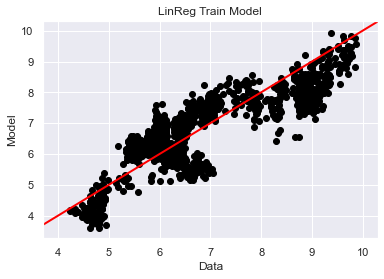

In [30]:
plt.scatter(y_train, y_train_pred,  color='black') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('LinReg Train Model')
plt.show()

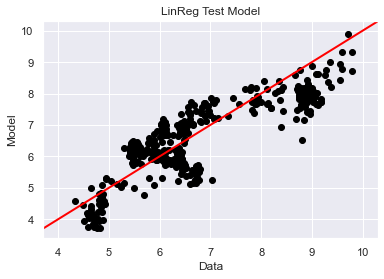

In [31]:
plt.scatter(y_test, y_test_pred,  color='black') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('LinReg Test Model')
plt.show()

<p> Linear Regression without scaling </p>

In [32]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [19.6966311]
Coefficients of Regression 	: a =  [[-1.21851109e+00 -2.88303787e-07  2.91844241e-06  1.54602418e+00]]



,Predictors,Coefficients
0,averageDifficulty,-1.218511e+00
1,cumulative total number of coins,-2.883038e-07
2,activeAddresses,2.918442e-06
3,Daily Hash Rate(Trillions of hashes/s),1.546024e+00


In [33]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7240806412619101
Mean Squared Error (MSE) 	: 0.5164926696825529

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7098514734339871
Mean Squared Error (MSE) 	: 0.5366661991007008



In [34]:
print(y_train_pred)

[[6.97250812]
 [7.0111885 ]
 [6.19013064]
 ...
 [9.83362492]
 [6.2555367 ]
 [8.38839445]]


In [35]:
print(y_train)

      price(USD)
1077    6.046994
1278    6.571051
604     5.765661
818     5.682320
942     5.879051
...          ...
563     5.990589
1396    7.065109
1687    9.769956
593     5.861811
1487    7.694516

[1608 rows x 1 columns]


In [36]:
print(y_test_pred)

[[7.00463192]
 [8.20421219]
 [5.90804094]
 [4.23962752]
 [7.45974634]
 [7.43953489]
 [7.42614314]
 [7.22232999]
 [5.78317835]
 [7.52499692]
 [3.83267238]
 [6.68931085]
 [8.13555734]
 [5.44613581]
 [4.5909596 ]
 [5.97148452]
 [6.78945374]
 [7.70770983]
 [7.69927637]
 [8.71300052]
 [8.10287456]
 [7.31589201]
 [5.88399116]
 [4.44375865]
 [6.49050684]
 [8.75773373]
 [8.40214082]
 [7.80103874]
 [7.86934017]
 [8.13095376]
 [5.71449344]
 [6.21489868]
 [4.07242505]
 [8.04671862]
 [6.12636875]
 [6.16697498]
 [6.07551951]
 [6.75829528]
 [5.80503812]
 [6.20628877]
 [5.95978388]
 [5.90570959]
 [7.36274547]
 [7.13672148]
 [4.8175929 ]
 [6.81053262]
 [5.88946295]
 [7.07084843]
 [5.97523567]
 [6.93919784]
 [6.81697229]
 [7.68855593]
 [7.46390153]
 [8.10478724]
 [4.21690012]
 [5.93161893]
 [6.70590134]
 [6.51199624]
 [7.58298979]
 [6.28516277]
 [6.99298533]
 [4.32838367]
 [7.86870439]
 [6.76170845]
 [6.22950439]
 [5.76718071]
 [6.97356232]
 [8.00783785]
 [7.74660531]
 [7.06441463]
 [5.90637966]
 [5.91

In [37]:
print(y_test)

      price(USD)
1113    6.117414
1582    8.427347
364     6.102312
129     4.778199
1391    6.955297
...          ...
258     6.737169
1665    9.012589
575     5.914853
1586    8.430604
1124    6.268111

[402 rows x 1 columns]


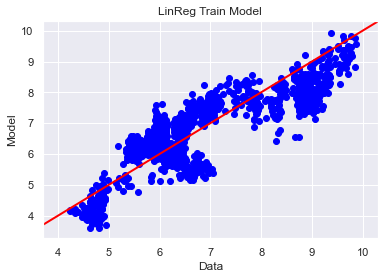

In [38]:
plt.scatter(y_train, y_train_pred,  color='blue') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('LinReg Train Model')
plt.show()

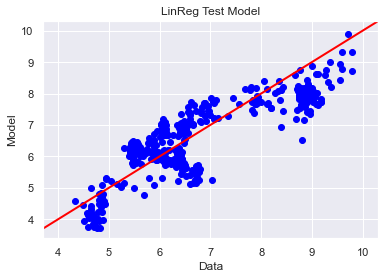

In [39]:
plt.scatter(y_test, y_test_pred,  color='blue') 
plt.axline( [4,4],[10,10],color='red',linewidth=2)
plt.xlabel('Data')
plt.ylabel('Model')
plt.title('LinReg Test Model')
plt.show()

<p>The plots and the accuracy parameters both have very similar values for the scaled and non-scaled models</p>

<p>Scaling does not seem to really have an affect on the accuracy on the linear regression (ordinary least squares) model, although the difference in the coefficients of regression is quite apparent.</p>
 
<p>For the scaled data, the coefficients of regression are of similar orders of power as compared to the huge differnce in the non-scaled version.</p>